In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('D:\chaki\Weather Dataset.csv', parse_dates=['Formatted Date'])
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [3]:
df.shape

(3780, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            3780 non-null   datetime64[ns, UTC]
 1   Summary                   3780 non-null   object             
 2   Precip Type               3780 non-null   object             
 3   Temperature (C)           3780 non-null   float64            
 4   Apparent Temperature (C)  3780 non-null   float64            
 5   Humidity                  3780 non-null   float64            
 6   Wind Speed (km/h)         3780 non-null   float64            
 7   Wind Bearing (degrees)    3780 non-null   float64            
 8   Visibility (km)           3780 non-null   float64            
 9   Loud Cover                3780 non-null   float64            
 10  Pressure (millibars)      3780 non-null   float64            
 11  Daily Summary    

# Handling missing values

In [5]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

As we see no missing values 

# Duplicates

In [6]:
duplicates = df.duplicated(subset=['Formatted Date','Temperature (C)','Pressure (millibars)'])
print(duplicates.sum())

1260


There are 1260 duplicats so we will drop the duplicates

In [7]:
# drop duplicate
df.drop_duplicates(subset=['Formatted Date','Temperature (C)','Pressure (millibars)'], inplace = True)

In [8]:
#check if there any duplicate
df[duplicates]
df.shape

C:\Users\hp\AppData\Local\Temp\ipykernel_10040\316872916.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[duplicates]


(2520, 12)

# Incorrect data

In [9]:
negative_temps = df[df['Temperature (C)'] < -200]
print(negative_temps)

               Formatted Date        Summary Precip Type  Temperature (C)  \
236 2006-04-18 18:00:00+00:00  Mostly Cloudy        rain          -2000.0   

     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
236                 16.188889      0.61             5.0876   

     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
236                    25.0          10.3523         0.0   

     Pressure (millibars)               Daily Summary  
236                1011.5  Partly cloudy until night.  


In [10]:
#remove outliers
df.drop(df[df['Temperature (C)'] == -2000].index, inplace = True)
df.drop(df[df['Humidity'] == -2000].index, inplace = True)
df.drop(df[df['Visibility (km)'] == -2000].index, inplace = True)
df.drop(df[df['Loud Cover'] == -2000].index, inplace = True)


#  Exploratory Data Analysis (EDA)

In [11]:
display(df.describe())

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.0,2517.000000
mean,10.144606,9.072631,0.807890,10.009518,201.628923,8.828749,0.0,994.952916
std,8.810092,9.924365,0.161962,5.956246,91.236492,4.545370,0.0,151.792372
min,-8.594444,-11.911111,0.320000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.161111,-0.288889,0.710000,5.313000,146.000000,5.538400,0.0,1010.780000
50%,10.577778,10.577778,0.860000,9.402400,198.000000,9.982000,0.0,1015.180000
75%,17.150000,17.150000,0.930000,13.652800,280.000000,11.270000,0.0,1023.520000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,0.0,1042.310000


In [12]:
#drop Loud Cover coulmn becouse all values in column equal 0
df = df.drop('Loud Cover', axis = 1)

In [13]:
display(df.describe())

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,10.144606,9.072631,0.807890,10.009518,201.628923,8.828749,994.952916
std,8.810092,9.924365,0.161962,5.956246,91.236492,4.545370,151.792372
min,-8.594444,-11.911111,0.320000,0.000000,0.000000,0.000000,0.000000
25%,2.161111,-0.288889,0.710000,5.313000,146.000000,5.538400,1010.780000
50%,10.577778,10.577778,0.860000,9.402400,198.000000,9.982000,1015.180000
75%,17.150000,17.150000,0.930000,13.652800,280.000000,11.270000,1023.520000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,1042.310000


### Plot temperature over time.

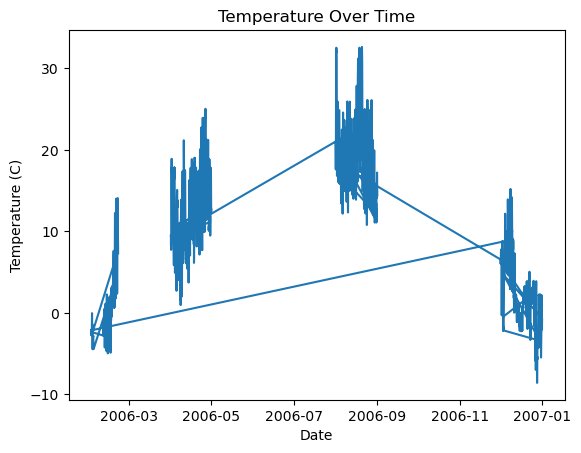

In [21]:
plt.plot(df['Formatted Date'],df['Temperature (C)'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

### histogram of temperature distribution.

(array([ 33., 324., 418., 301., 284., 436., 391., 218.,  70.,  42.]),
 array([-8.59444444, -4.47111111, -0.34777778,  3.77555556,  7.89888889,
        12.02222222, 16.14555556, 20.26888889, 24.39222222, 28.51555556,
        32.63888889]),
 <BarContainer object of 10 artists>)

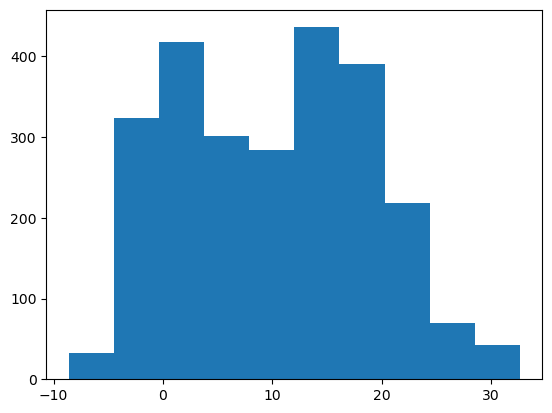

In [15]:
plt.hist(df['Temperature (C)'])

### scatter plot of temperature vs. humidity.

Text(0, 0.5, 'Humidity (C)')

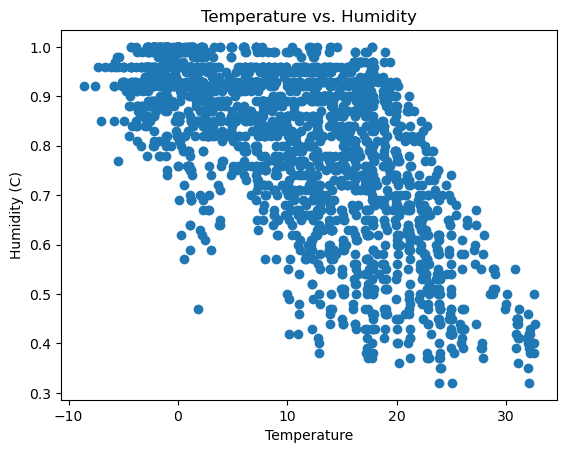

In [16]:
plt.scatter(df['Temperature (C)'], df['Humidity'])
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity (C)')

### correlation heatmap

<AxesSubplot:>

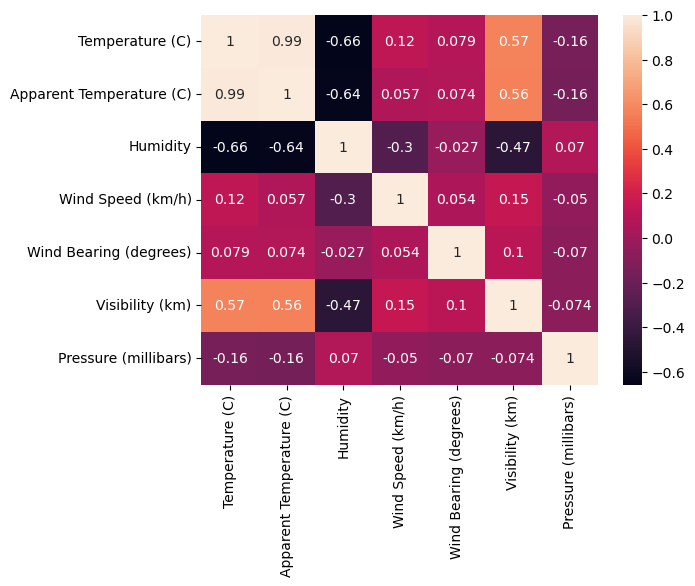

In [17]:
sns.heatmap(df.corr(), annot = True)